# Graph Visualization

We've learned from the [Workflow](./basic_workflow.ipynb) tutorial that every Nipype workflow is a directed acyclic graphs. Some workflow structures are easy to understand directly from the script and some others are too complex for that. Luckily, there is the ``write_graph`` method!

## ``write_graph``

**``write_graph``** allows us to visualize any workflow in five different ways:

- **``orig``** - creates a top level graph without expanding internal workflow nodes
- **``flat``** - expands workflow nodes recursively
- **``hierarchical``** - expands workflow nodes recursively with a notion on hierarchy
- **``colored``** - expands workflow nodes recursively with a notion on hierarchy in color
- **``exec``** - expands workflows to depict iterables

Which graph visualization should be used is chosen by the **``graph2use``** parameter.

Additionally, we can also choose the format of the output file (png or svg) with the **``format``** parameter.

A third parameter, called **``simple_form``** can be used to specify if the node names used in the graph should be of the form ***``nodename (package)``*** or  ***``nodename.Class.package``***.

## Preparation

Instead of creating a new workflow from scratch, let's just import one from the Nipype workflow library.

In [1]:
# Import the function to create an spm fmri preprocessing workflow
from nipype.workflows.fmri.spm import create_spm_preproc

# Create the workflow object
spmflow = create_spm_preproc()

For a reason that will become clearer under the ``exec`` visualization, let's add an iternode at the beginning of the ``spmflow`` and connect them together under a new workflow, called ``metaflow``. The iternode will cause the workflow to be executed three times, once with the ``fwhm`` value set to 4, once set to 6 and once set to 8. For more about this see the [Iteration](./basic_iteration.ipynb) tutorial.

In [2]:
# Import relevant modules
from nipype import IdentityInterface, Node, Workflow

# Create an iternode that iterates over three different fwhm values
inputNode = Node(IdentityInterface(fields=['fwhm']), name='iternode')
inputNode.iterables = ('fwhm', [4, 6, 8])

# Connect inputNode and spmflow in a workflow
metaflow = Workflow(name='metaflow')
metaflow.connect(inputNode, "fwhm", spmflow, "inputspec.fwhm")

# ``orig`` graph

This visualization gives us a basic overview of all the nodes and internal workflows in a workflow and shows in a simple way the dependencies between them.

170822-16:24:54,215 workflow INFO:
	 Generated workflow graph: /tutorial/notebooks/graph_orig.dot.png (graph2use=orig, simple_form=True).


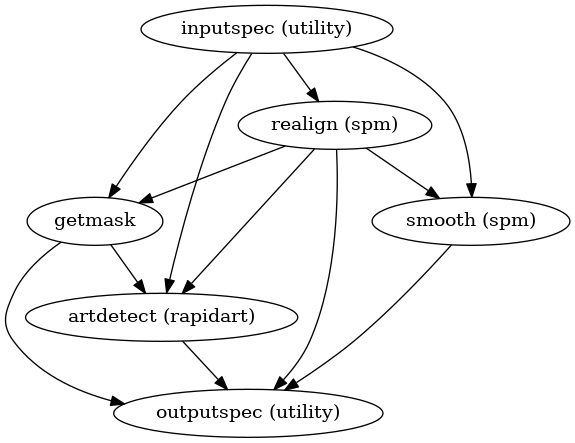

In [3]:
# Write graph of type orig
spmflow.write_graph(graph2use='orig', dotfilename='./graph_orig.dot')

# Visulaize graph
from IPython.display import Image
Image(filename="graph_orig.dot.png")

# ``flat`` graph

This visualization gives us already more information about the internal structure of the ``spmflow`` workflow. As we can, the internal workflow ``getmask`` from the ``orig`` visualization above was replaced by the individual nodes contained in this internal workflow.

170822-16:24:55,57 workflow INFO:
	 Generated workflow graph: /tutorial/notebooks/graph_flat.dot.png (graph2use=flat, simple_form=True).


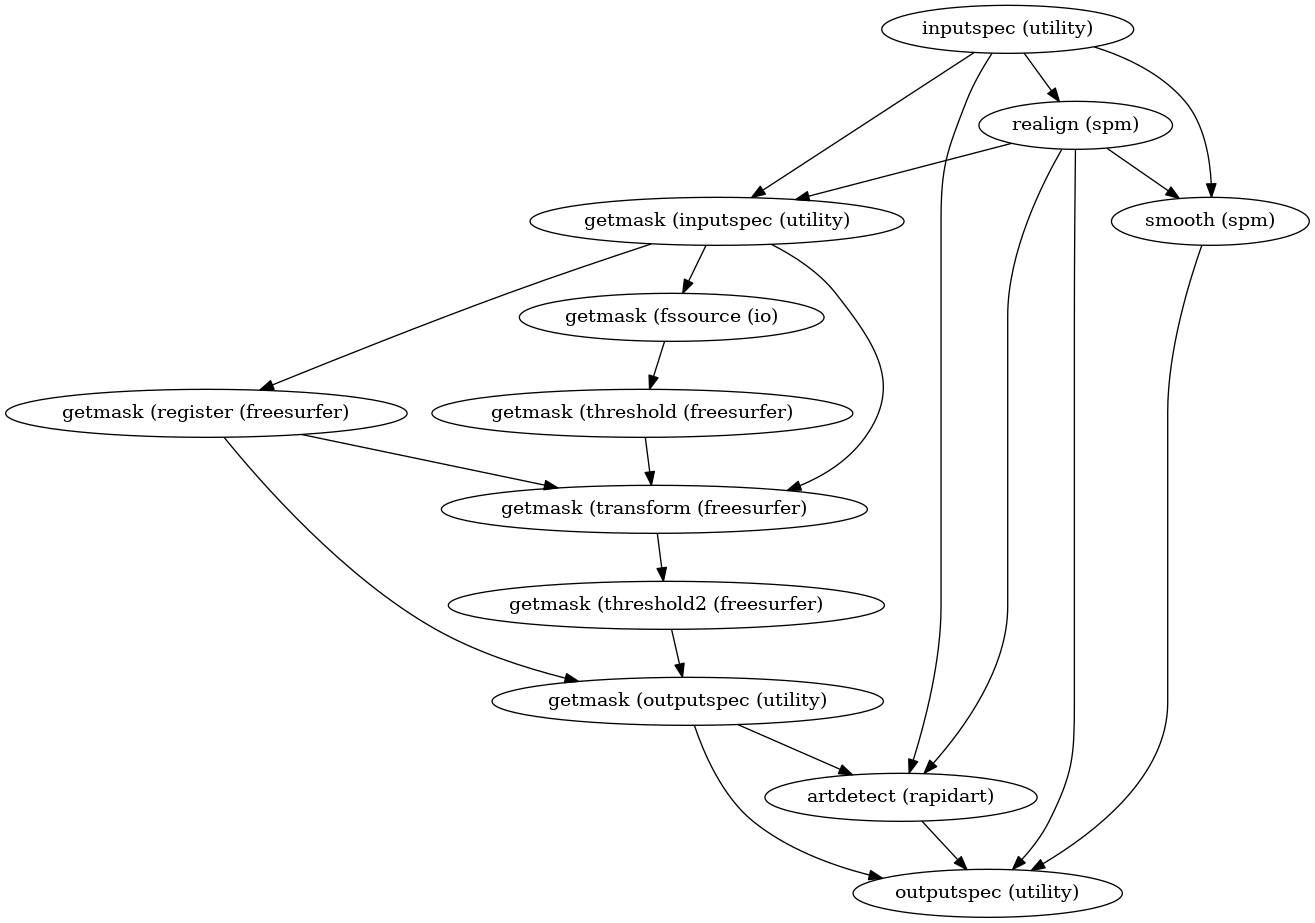

In [4]:
# Write graph of type flat
spmflow.write_graph(graph2use='flat', dotfilename='./graph_flat.dot')

# Visulaize graph
from IPython.display import Image
Image(filename="graph_flat.dot.png")

# ``hierarchical`` graph

To better appreciate this visualization, let's look at the ``metaflow`` workflow that has one hierarchical level more than the ``spmflow``.

As you can see, this visualization makes it much clearer which elements of a workflow are nodes and which ones are internal workflows. Also, each connection is shown as an individual arrow, and not just represented by one single arrow between two nodes. Additionally, iternodes and mapnodes are visualized differently than normal nodes to make them pop out more.

170822-16:24:56,107 workflow INFO:
	 Generated workflow graph: ./graph_hierarchical.dot.png (graph2use=hierarchical, simple_form=True).


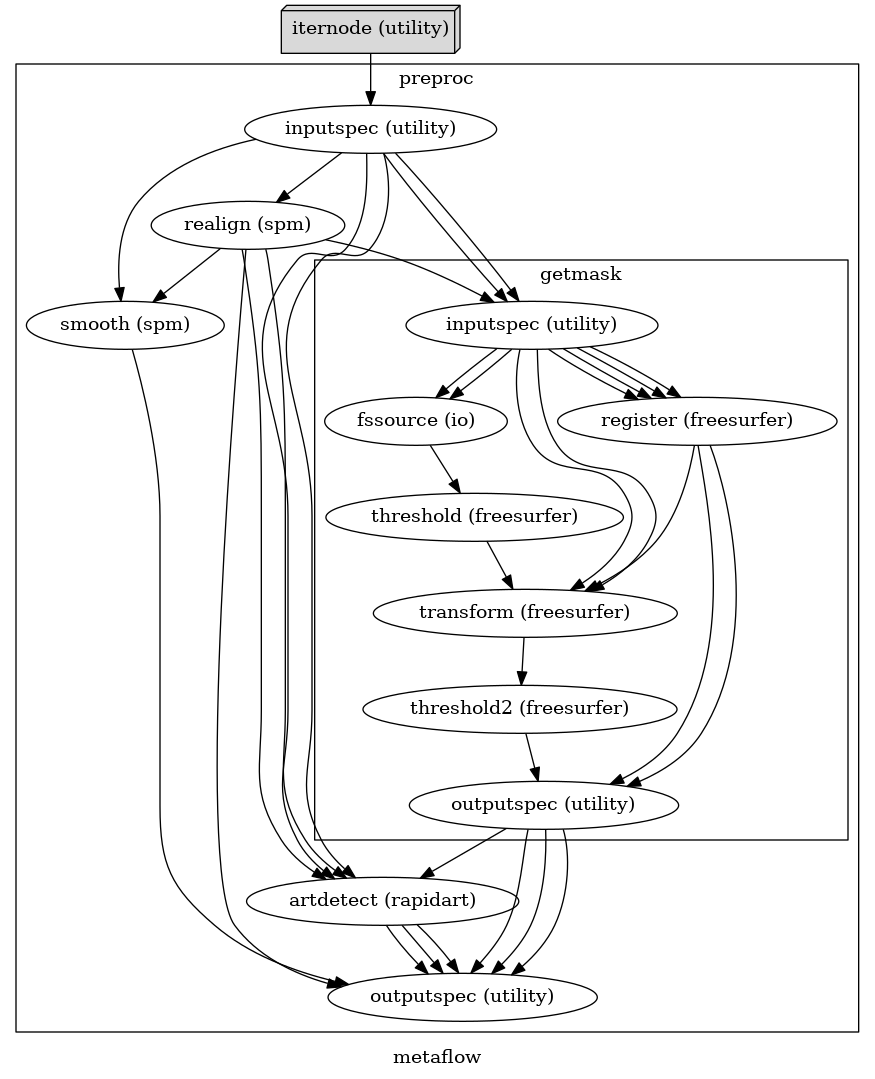

In [5]:
# Write graph of type hierarchical
metaflow.write_graph(graph2use='hierarchical', dotfilename='./graph_hierarchical.dot')

# Visulaize graph
from IPython.display import Image
Image(filename="graph_hierarchical.dot.png")

# ``colored`` graph

This visualization is almost the same as the ``hierarchical`` above. The only difference is that individual nodes and different hierarchy levels are colored coded differently.

170822-16:24:57,185 workflow INFO:
	 Generated workflow graph: ./graph_colored.dot.png (graph2use=colored, simple_form=True).


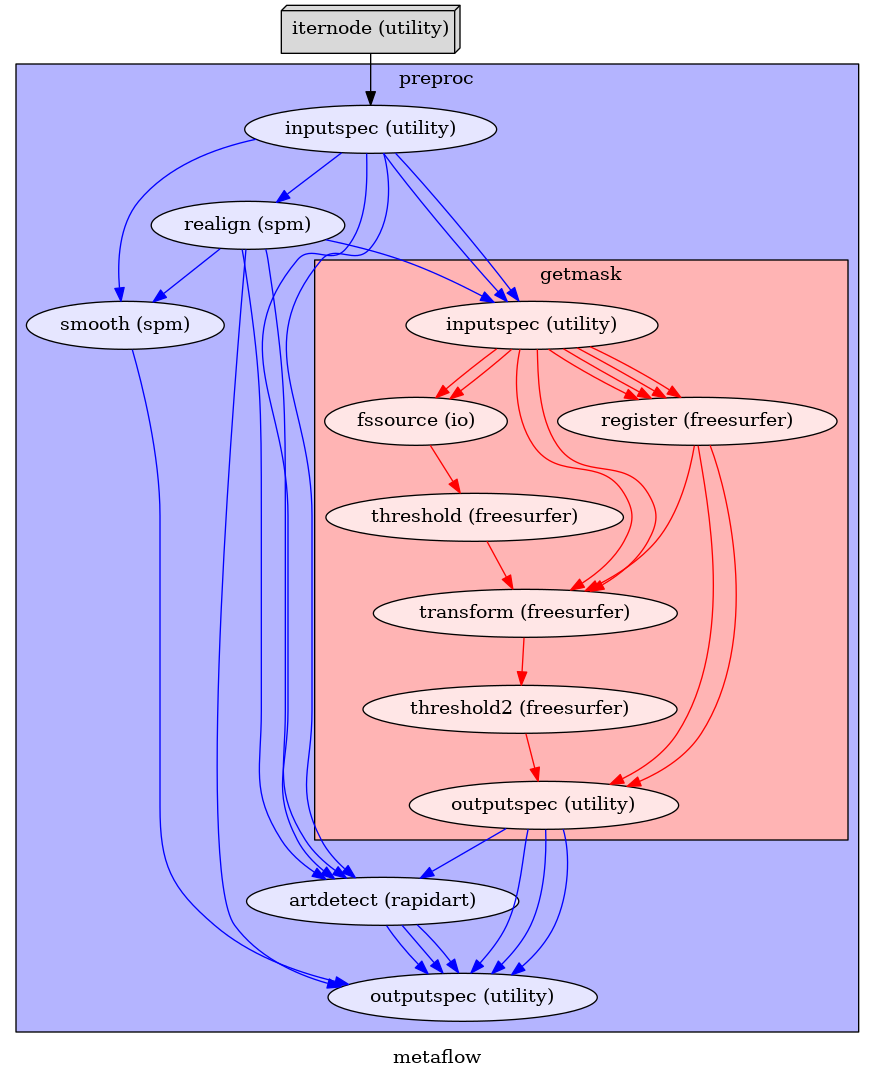

In [6]:
# Write graph of type colored
metaflow.write_graph(graph2use='colored', dotfilename='./graph_colored.dot')

# Visulaize graph
from IPython.display import Image
Image(filename="graph_colored.dot.png")

# ``exec`` graph

This visualization is the most different from the rest. Like the ``flat`` visualization, it depicts all individual nodes. But additionally, it drops the ``utility`` nodes from the workflow and expands workflows to depict iterables (can be seen in the ``detailed_graph`` visualization further down below).

170822-16:24:57,755 workflow INFO:
	 Generated workflow graph: /tutorial/notebooks/graph_exec.dot.png (graph2use=exec, simple_form=True).


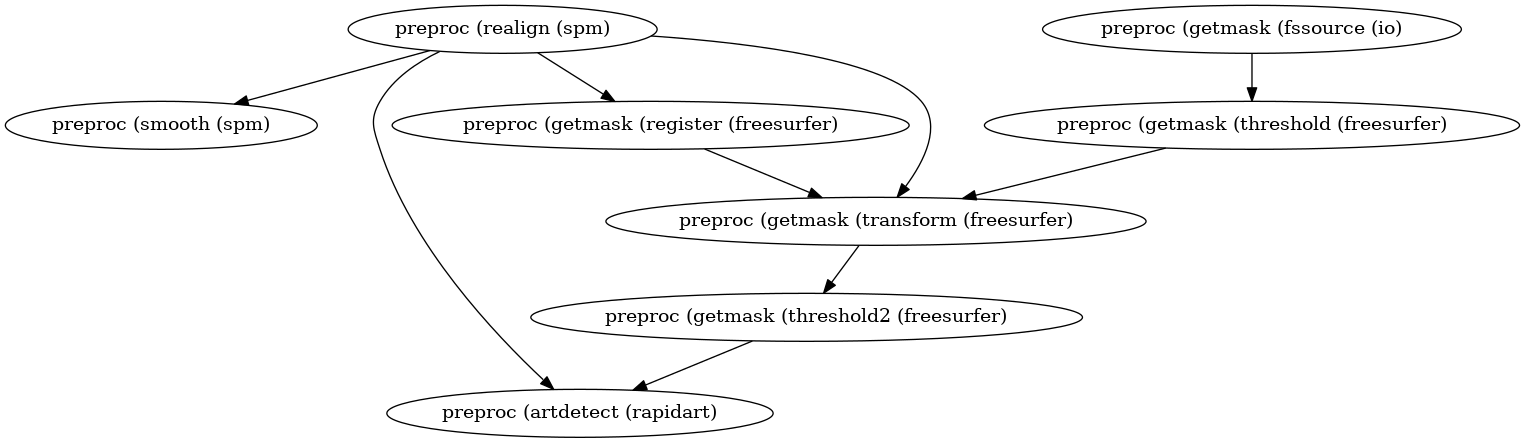

In [7]:
# Write graph of type exec
metaflow.write_graph(graph2use='exec', dotfilename='./graph_exec.dot')

# Visulaize graph
from IPython.display import Image
Image(filename="graph_exec.dot.png")

# Detailed graphs

The ``orig``, ``flat`` and ``exec`` visualization also create a **detailed graph** whenever ``write_graph`` is executed. A detailed graph shows a node with not just the node name, but also with all its input and output parameters.

## detailed ``flat`` graph

For example, the detailed graph of the ``flat`` graph looks as follows:

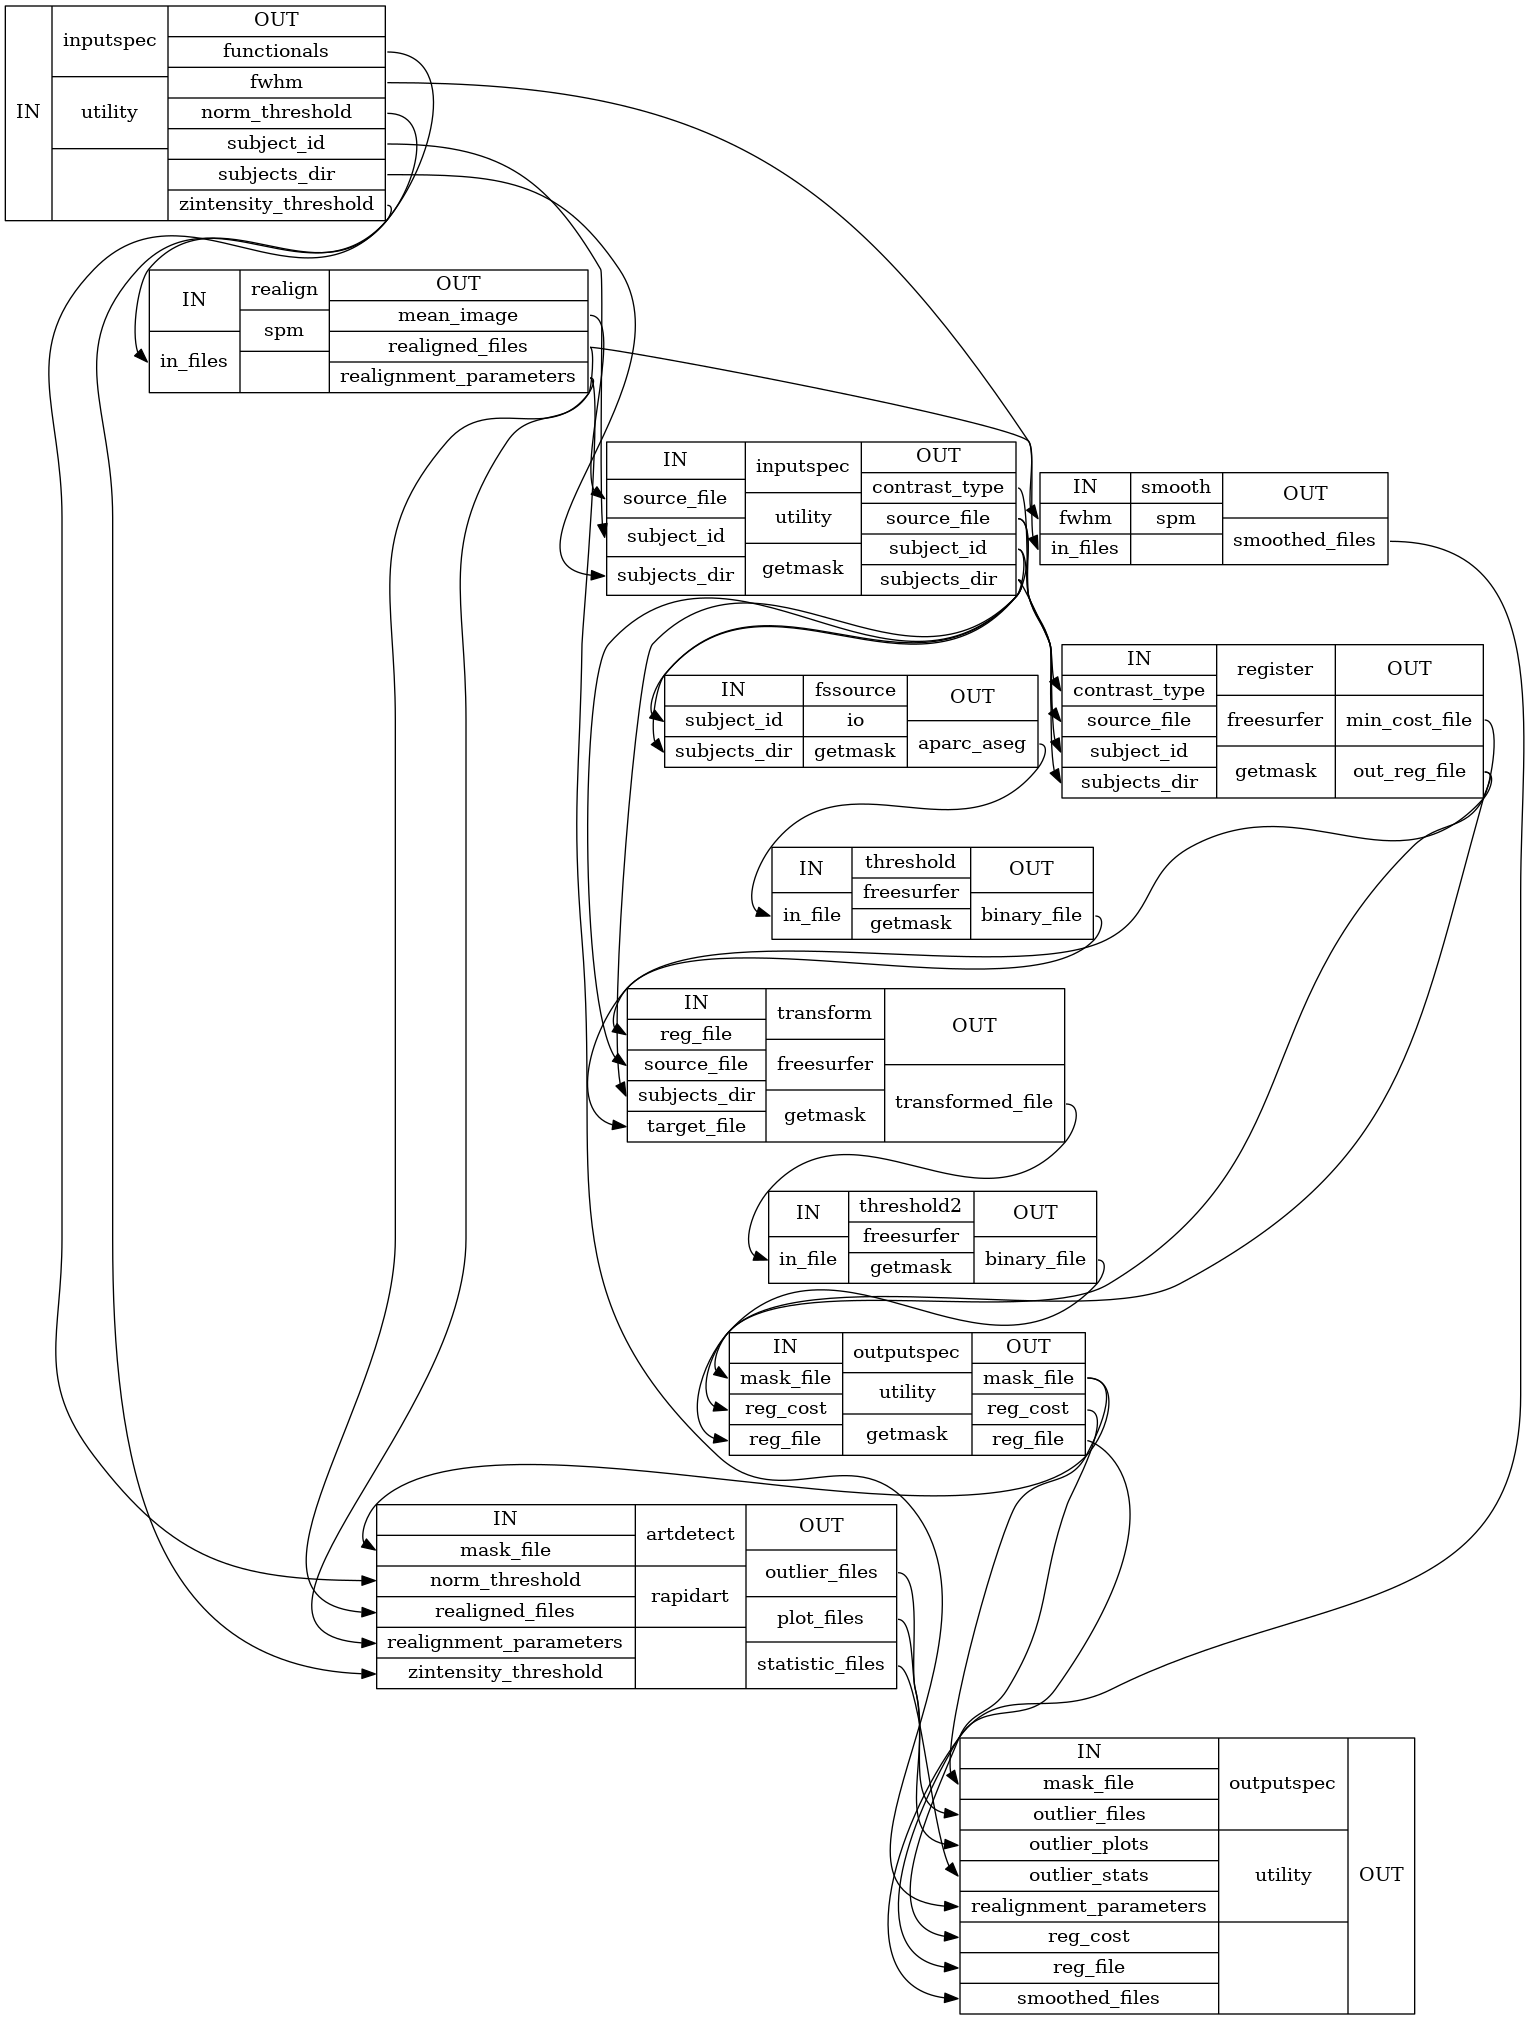

In [8]:
from IPython.display import Image
Image(filename="graph_flat_detailed.dot.png")

Such a visualization might be more complicated to read, but it gives you complete overview of a workflow and all its components.

## detailed ``exec`` graph

Now, if we look at the detailed graph of the ``exec`` visualization, we can see where the iteration takes place:

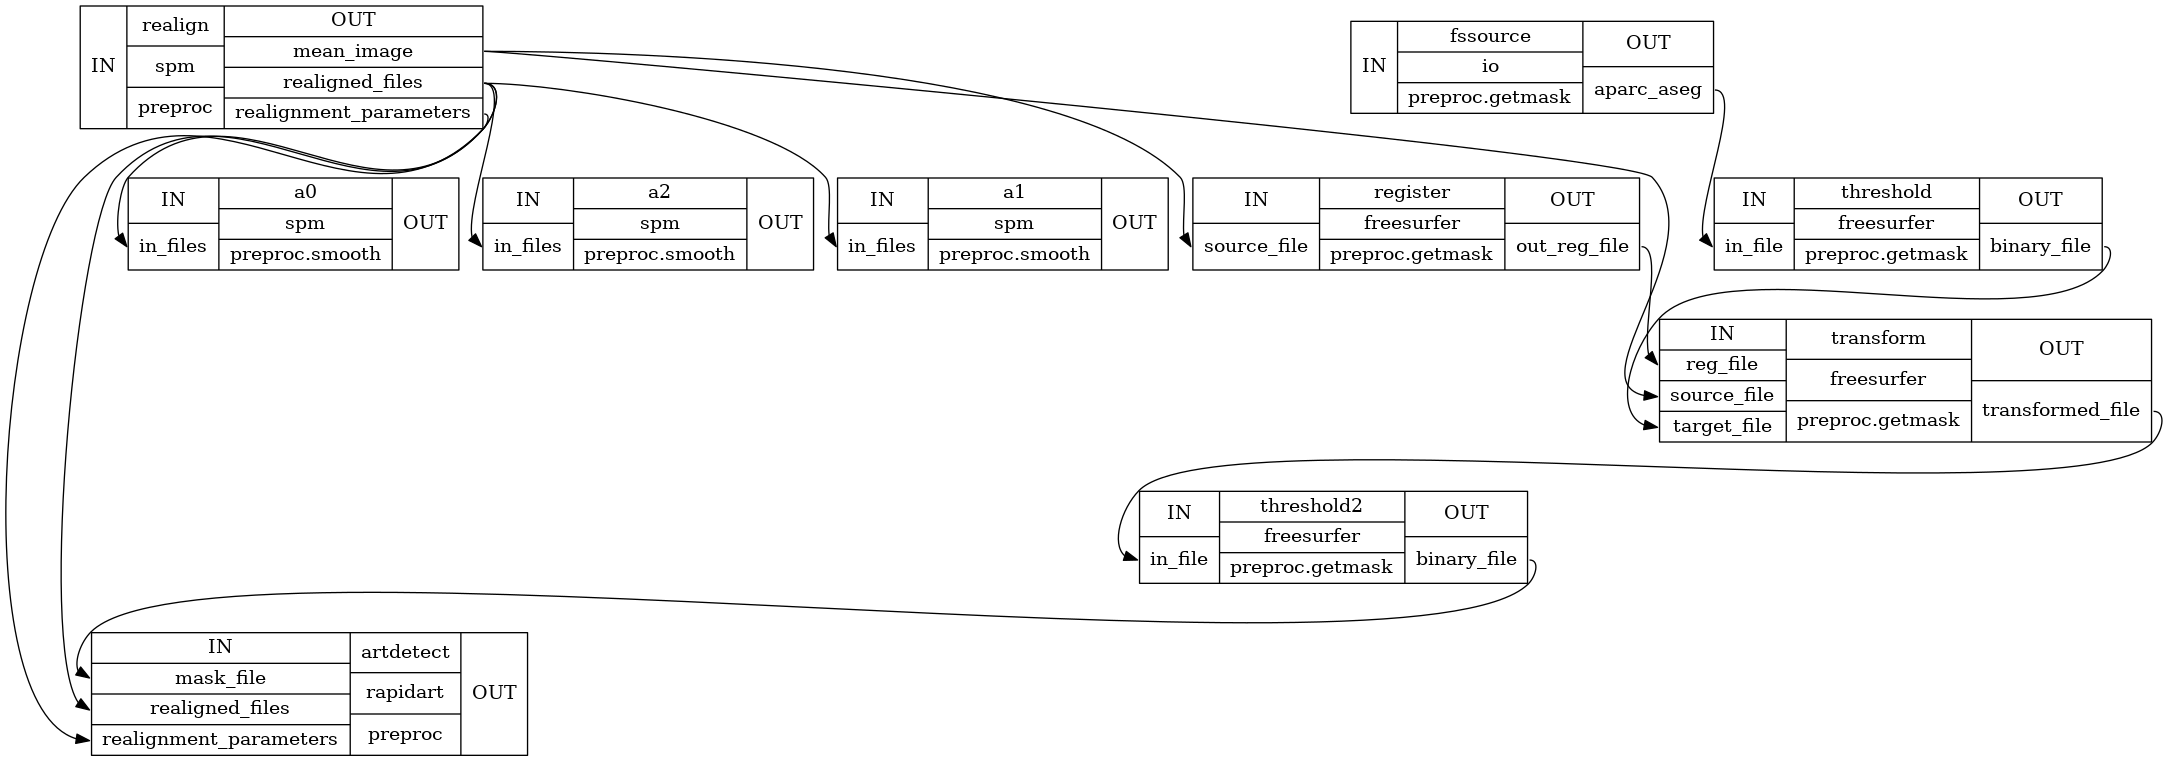

In [9]:
from IPython.display import Image
Image(filename="graph_exec_detailed.dot.png")

In the middle left of the figure we have three ``preproc.smooth`` nodes of the ``spm`` interface with the names "a0", "a1" and "a2". Those represent the three smoothing nodes with the ``fwhm`` parameter set to 4, 6 and 8. Now if those nodes would be connected to another workflow, this would mean that the workflow that follows would be depicted three times, each time for another input coming from the ``preproc.smooth`` node.

Therefore, the **detailed ``exec``** visualization makes all individual execution elements very clear and allows it to see which elements can be executed in parallel.

# ``simple_form``

Last but not least is the third ``write_graph`` argument, ``simple_form``. If this parameter is set to ``False``, this means that the node names in the visualization will be written in the form of ***``nodename.Class.package``***, instead of ***``nodename (package)``***. For example, let's look at the ``orig``visualization with ``simple_form`` set to ``False``.

170822-16:24:58,345 workflow INFO:
	 Generated workflow graph: /tutorial/notebooks/graph_orig_notSimple_detailed.dot.png (graph2use=orig, simple_form=False).


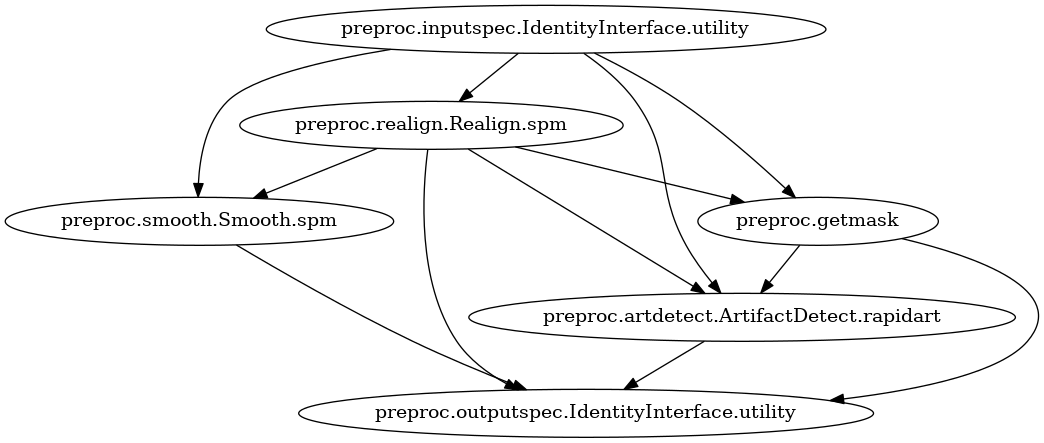

In [10]:
# Write graph of type orig
spmflow.write_graph(graph2use='orig', dotfilename='./graph_orig_notSimple.dot', simple_form=False)

# Visulaize graph
from IPython.display import Image
Image(filename="graph_orig_notSimple.dot.png")